# K Nearest Neighbour

### Danny Rachmadian Yusuf Satryatama

## Objective

Membuat model prediktif yang mampu mengklasifikasikan apakah seorang siswa berisiko mengalami kecanduan media sosial berdasarkan pola penggunaan, demografi, dan dampak yang dilaporkan, menggunakan algoritma K-Nearest Neighbors (KNN).

## Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings

warnings.filterwarnings('ignore')

## Data Loading and Preparation

In [7]:
# Load the dataset
# Make sure 'students_social_media_preprocessed.csv' is in the same directory
df = pd.read_csv('students_social_media_preprocessed.csv')

# Display the first few rows of the dataframe
print("Dataset Head:")
print(df.head())

# Display dataset info
print("\nDataset Info:")
df.info()

Dataset Head:
        Age  Avg_Daily_Usage_Hours  Sleep_Hours_Per_Night  \
0 -1.186915               0.223857              -0.327638   
1  0.958662              -2.243309               0.560423   
2 -0.471723               0.860545              -1.659730   
3 -1.902108              -1.527035               0.116393   
4  0.243470              -0.333245              -0.771668   

   Mental_Health_Score  Conflicts_Over_Social_Media  Addicted_Score  \
0            -0.205520                     0.157063        0.985550   
1             1.605628                    -2.976790       -2.166958   
2            -1.111095                     1.201681        1.616052   
3             0.700054                    -1.932172       -1.536456   
4            -0.205520                    -0.887554        0.355048   

   Gender_Encoded  Affects_Academic_Performance_Encoded  \
0               0                                     1   
1               1                                     0   
2              

In [8]:
# Statistical summary
print("STATISTICAL SUMMARY")
print("="*50)
df.describe()

STATISTICAL SUMMARY


,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,Gender_Encoded,Affects_Academic_Performance_Encoded,Academic_Level_Graduate,Academic_Level_High School,...,Country_Switzerland,Country_Turkey,Country_UAE,Country_UK,Country_USA,Usage_Category_Encoded,Adequate_Sleep,Mental_Health_Risk_Encoded,SM_Impact_Score,Lifestyle_Balance
count,7.050000e+02,7.050000e+02,7.050000e+02,7.050000e+02,705.000000,7.050000e+02,705.000000,705.000000,705.000000,705.000000,...,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,-9.070758e-16,1.411007e-16,-2.721227e-16,-2.872407e-16,0.000000,-1.209434e-16,0.499291,0.642553,0.460993,0.038298,...,0.038298,0.038298,0.011348,0.031206,0.056738,1.960284,0.472340,1.363121,0.370719,0.040738
std,1.000710e+00,1.000710e+00,1.000710e+00,1.000710e+00,1.000710,1.000710e+00,0.500354,0.479588,0.498830,0.192051,...,0.192051,0.192051,0.105994,0.173997,0.231505,0.670913,0.499589,0.562867,0.300744,0.353827
min,-1.902108e+00,-2.720825e+00,-2.725403e+00,-2.016669e+00,-2.976790,-2.797459e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,-1.186915e+00,-6.515892e-01,-7.716685e-01,-1.111095e+00,-0.887554,-9.059547e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,-0.248768
50%,2.434698e-01,-9.448721e-02,2.758658e-02,-2.055204e-01,0.157063,3.550484e-01,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.457143,0.071429
75%,9.586624e-01,7.013728e-01,7.380355e-01,7.000540e-01,1.201681,9.855500e-01,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,0.614286,0.306897
max,2.389048e+00,2.850195e+00,2.425352e+00,2.511203e+00,2.246298,1.616052e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000,1.000000,0.900000


## Feature Engineering

Model KNN memerlukan variabel target yang bersifat kategori. Di sini, kita mengubah kolom numerik Addicted_Score menjadi kolom kategori biner Addiction_Status.

In [9]:
# Create the categorical target variable 'Addiction_Status'
# A value of 1 for 'Addicted' (if the score is above the median)
# A value of 0 for 'Not Addicted' (if the score is at or below the median)

median_score = df['Addicted_Score'].median()
df['Addiction_Status'] = (df['Addicted_Score'] > median_score).astype(int)

print("\nAddiction Status Distribution (0 = Not Addicted, 1 = Addicted):")
print(df['Addiction_Status'].value_counts())


Addiction Status Distribution (0 = Not Addicted, 1 = Addicted):
Addiction_Status
0    506
1    199
Name: count, dtype: int64


## Define Features (X) and Target (y) then split the data

Kita pisahkan kolom yang akan berfungsi sebagai Feature (Predictors) dengan kolom target. Lalu, dataset nya kita pisahkan menjadi 2 set berbeda, yaitu _training set_ (80%) dan _testing set_ (20%)

In [10]:
# Define X (features) by dropping the original score and the new target column
X = df.drop(['Addicted_Score', 'Addiction_Status'], axis=1)

# Define y (target)
y = df['Addiction_Status']

# Split the data into 80% training and 20% testing sets
# 'random_state=42' ensures the split is reproducible
# 'stratify=y' ensures the proportion of target classes is the same in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set size (X_train): {X_train.shape}")
print(f"Test set size (X_test): {X_test.shape}")


Training set size (X_train): (564, 63)
Test set size (X_test): (141, 63)


## Find the Optimal K Value

Kita akan melatih model dengan berbagai value K dan memvisualisasikan Error Rate untuk menemukan value K terbaik

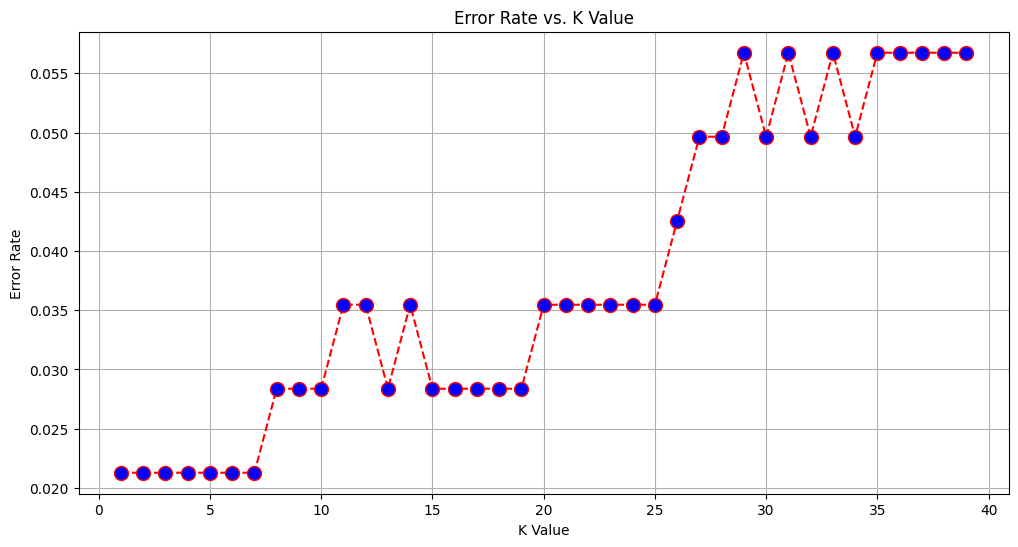

In [11]:
error_rate = []
k_range = range(1, 40) # Test k values from 1 to 39

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # The error rate is the mean of where predictions are not equal to the actual values
    error_rate.append(np.mean(pred_i != y_test))

# Create a plot to visualize the Error Rate vs. K Value
plt.figure(figsize=(12, 6))
plt.plot(k_range, error_rate, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

## Train Final Model and Make Predictions

Setelah menemukan value K terbaik, yaitu K = 1, kita akan menggunakan value tersebut untuk melatih model akhir dan membuat prediksi pada _testing set_

In [12]:
# Find the 'k' with the lowest error from the error_rate list
# We add 1 because the list index starts at 0, while k_range starts at 1
optimal_k = k_range[np.argmin(error_rate)]
print(f"Optimal 'k' value found is: {optimal_k}\n")

# Initialize the final KNN model with the optimal 'k'
knn_final = KNeighborsClassifier(n_neighbors=optimal_k)

# Train the model on the training data
knn_final.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_final.predict(X_test)

Optimal 'k' value found is: 1



Note.

Meskipun kita hanya mengambil sebanyak 1 tetangga yang dapat menyebabkan overfitting, namun pada dataset yang kita ambil, data untuk class "Addicted" dan "Not Addicted" terpisah dengan baik (Well-Seperated) dan memiliki pola yang sangat jelas untuk dibedakan.

## Model Performance

Kita dapat melihat seberapa baik performa dari model yang kita buat menggunakan accuracy, classification report, dan confusion matrix.

KNN Model Accuracy: 0.9787

Classification Report:
              precision    recall  f1-score   support

Not Addicted       0.98      0.99      0.99       101
    Addicted       0.97      0.95      0.96        40

    accuracy                           0.98       141
   macro avg       0.98      0.97      0.97       141
weighted avg       0.98      0.98      0.98       141

Confusion Matrix:
[[100   1]
 [  2  38]]


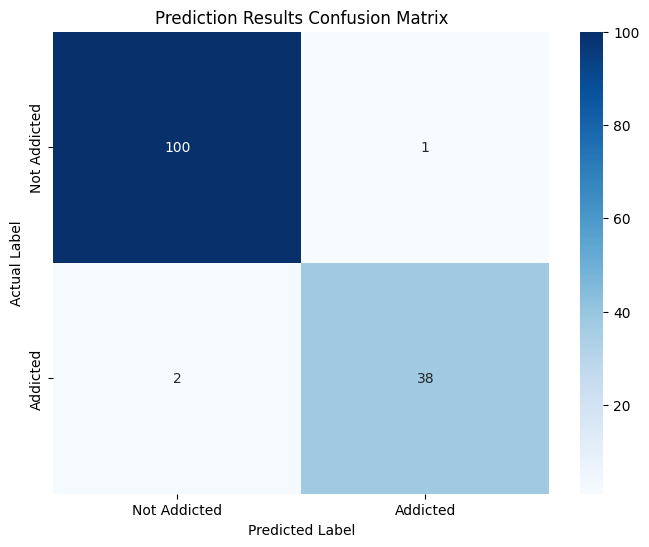

In [13]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy: {accuracy:.4f}")

# Display the Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
# 'target_names' provides labels for classes 0 and 1
class_report = classification_report(y_test, y_pred, target_names=['Not Addicted', 'Addicted'])
print(class_report)

# Display the Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Visualize the Confusion Matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Addicted', 'Addicted'],
            yticklabels=['Not Addicted', 'Addicted'])
plt.title('Prediction Results Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## Conclusion

Tujuan dari analisis ini adalah untuk mengembangkan Predictive Model untuk mengklasifikasikan status kecanduan media sosial siswa menggunakan algoritma K Nearest Neighbours (KNN). Kita dapat melihat bahwa:

1. Performa Model yang Luar Biasa: Model KNN yang kita buat menunjukkan performa prediksi yang sangat baik, dengan mencapai akurasi sebesar 98% pada data uji. Hal ini menunjukkan bahwa model sangat andal dalam membedakan antara siswa yang berisiko kecanduan dan yang tidak.

2. Tingkat Presisi dan Recall yang tinggi: Model yang kita buat tidak hanya akurat tapi juga kokoh. Dengan presisi 97% dan recall 95% untuk kelas 'Addicted', model ini sangat efektif baik dalam mengidentifikasi siswa berisiko secara tepat maupun dalam meminimalkan False Positive / Negative.

3. Value K yang optimal menunjukkan Data Separation yang jelas: Jumlah tetangga optimal ditemukan pada nilai K = 1. Ini adalah temuan signifikan yang mengimplikasikan bahwa fitur-fitur dalam dataset menciptakan kelompok (cluster) yang sangat jelas dan terpisah dengan baik untuk setiap kelas. Dengan kata lain, status kecanduan seorang siswa dapat diprediksi secara akurat hanya dengan melihat satu siswa lain yang paling mirip dalam dataset.

Limitations:

1. Model dengan jumlah tetangga (K) = 1 dapat menjadi sensitif terhadap Noise atau Outliers pada data. Mungkin jika dataset diupdate, kita dapat menggunakan nilai K yang lebih tinggi agar lebih _robust_